In [1]:
# using df10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data= pd.read_csv('DFG_B_df10.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(3)

,location,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,gender,household,rln_status,work_paid,work_vol,walk_aid,imm_status,bside_dur,bside_pre,bside_pre_muni
0,LONDONDERRY,2.0,1.0,2.0,3.0,2.0,4.0,8.0,2.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,0.0
1,LIONS VIEW BLDG III,2.0,1.0,1.0,2.0,5.0,5.0,8.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,0.0,0.0
2,MOUNT PLEASANT,2.0,1.0,3.0,2.0,2.0,4.0,9.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,4.0,3.0,1.0


In [2]:
data.describe()

,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,gender,household,rln_status,work_paid,work_vol,walk_aid,imm_status,bside_dur,bside_pre,bside_pre_muni
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000
mean,2.076233,1.475336,1.995516,2.538117,2.130045,3.910314,7.914798,1.345291,0.901345,1.923767,3.026906,2.843049,1.77130,0.582960,3.533632,2.300448,0.811659
std,0.433424,0.924185,1.067530,0.842096,0.952069,0.844181,1.016488,0.530224,0.298869,1.134440,0.607159,0.388499,0.42094,0.494179,0.733674,1.179536,0.391864
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,2.000000,1.500000,4.000000,8.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.00000,0.000000,3.000000,2.000000,1.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,8.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.00000,1.000000,4.000000,2.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,9.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.00000,1.000000,4.000000,2.000000,1.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,3.000000,1.000000,4.000000,4.000000,3.000000,2.00000,1.000000,4.000000,7.000000,1.000000


In [3]:
data.mode()

,location,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,gender,household,rln_status,work_paid,work_vol,walk_aid,imm_status,bside_dur,bside_pre,bside_pre_muni
0,BRIDGEVIEW PLACE,2.0,1.0,1.0,2.0,2.0,4.0,8.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,4.0,2.0,1.0


In [4]:
# categorical = location, gender, rln_status, work_paid, work_vol, bside_pre
# binary = household, walk_aid, imm_status, bside_pre_muni
# ordinal = nbr_relation, food_worry, apprch_bside, hlth_happy, chat_often, rlns_safe, age,
#      bside_dur

In [5]:
# will opt not to use df visualizations straight from deepnote 
#  (no % functionality)

In [6]:
# variable likely most interesting is location -> use as basis for comparison
loc = data.location.value_counts()
loc

BRIDGEVIEW PLACE        24
COLEOPY PARK            19
COLLINGWOOD TOWER       16
LIONS VIEW BLDG I       15
LIONS VIEW BLDG II      15
GORDONFAHRNI            13
MORELAND KENNEDY        11
GLYNN MANOR             11
LIONS VIEW BLDG III     10
WALLACE WILSON           9
SOROPTIMIST LIONS        9
MOUNT PLEASANT           9
ALICE SAUNDERS           7
ARBUTUS COURT            7
LONDONDERRY              7
MAGNOLO MANOR            7
BURRARD MANOR            6
LOYAL ORANGE             5
HARWOOD MANOR            5
FLORENCE MANOR           5
MACLEOD MANOR            4
MUIR MANOR               4
KINGS DAUGHTERS          2
WILSON HEIGHTS MANOR     1
EDWARD BYERS             1
FIRST LUTHERAN COURT     1
Name: location, dtype: int64

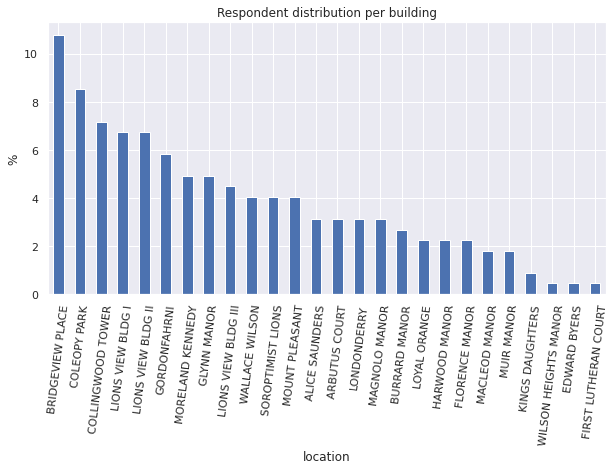

In [7]:
perc = (loc / loc.sum())*100
plt.figure(figsize=(10,5))
perc.plot(kind='bar',rot=83)
plt.xlabel('location')
plt.ylabel('%')
plt.title('Respondent distribution per building');
# majority of respondents are from Bridgeview Place and Coleopy Park
## --> are the whole buildings managed by BS?  Assume no, because some buildings
##     only have 1-2 respondents
## are these respondents representative of BS population per building?

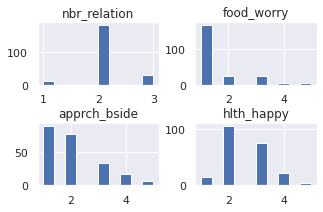

In [8]:
data.iloc[:,:5].hist(figsize = (5,3))
plt.subplots_adjust(hspace= 0.6,wspace=0.3)
# nbr relation 2 = no change
# food_worry 'I worried about not being able to get enough to eat' 
#  --> suggest make question simpler! 
#  1 = never --> ie, not worried about food
# apprc_bside 'How approachable do you think Brightside is?'
#  1 = very approachable  --> good results
# hlth_happy 'rate your happiness'
#  1 = very happy --> most are happy or neutral

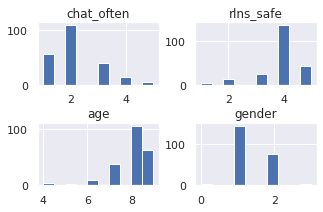

In [9]:
data.iloc[:,5:9].hist(figsize = (5,3))
plt.subplots_adjust(hspace= 0.6,wspace=0.3)
# chat often:  how often do you have conversations with your neighbours
# 1 = everyday, 2 = a few times per week  --> acceptable social interaction
# rlns_safe: feel safe living in this building
# 1 = strongly disagree, 4 = agree  --> tenants feel safe
# age 5 = 35-44, 6 = 45-54, 7 = 55-64, 8 = 65-74, 9 = >75
#   --> most are aged >55
# gender: 'which gender do you identify'
# 1= female, 2=male

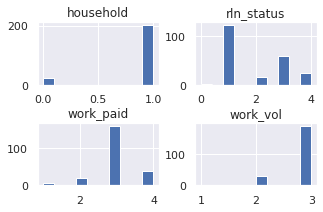

In [10]:
data.iloc[:,9:13].hist(figsize = (5,3))
plt.subplots_adjust(hspace= 0.6,wspace=0.3)
# household: 'household composition'
# 0 = not living alone, 1 = living alone  --> most live by themselves
# rln_status: 'relationship status'
# 1 = single, 2 = married/living-in, 3 = div/sep, 4 = widowed  --> most are single
# work_paid: 'doing any paid work'
# 1 = full-time, 2 = part-time, 3 = no, ret, 4 = no, not currently working --> most are retired
# work_vol: 'doing any volunteer work'
# 1 = full-time, 2 = part-time, 3 = no  --> most not doing vol work

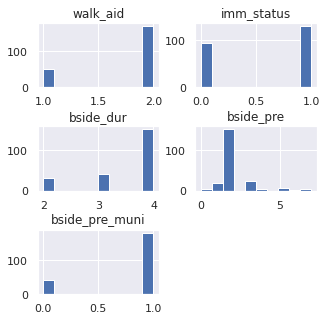

In [11]:
data.iloc[:,13:18].hist(figsize = (5,5))
plt.subplots_adjust(hspace= 0.6,wspace=0.3)
# walk-aid: 'use a mobility aid when you walk'
# 1 = yes  --> most do not require a walking aid
# imm_status: 'immigrant to Canada'
# 0 = yes, 1 = no  --> more than half are Canadian-born
# bside_dur: 'How long have you lived in a Brightside building'
# 1 = <1yr, 2 = 1-3yrs, 3 = 4-6yrs, 4 = >6yrs  --> majority are long-term tenants
# bside-pre: 'type of housing did you live in just before moving to a Brightside building'
# 0 = other, 1 = social housing, 2 = private market housing,
# 3 = lived with family, 4 = transitional housing, 
# 5 = couch-surfing/temp, 6 = homeless, 7 = shelter  
#     --> majority were privately renting before going to bside
# bside_pre_muni: 'municipality did you live in just before moving to the Brightside building'
# 0 = other, 1 = Vancouver  --> most were from Vancouver

### Findings:

Most tenants are Canadian-born, aged >55, female, single and living by themselves.

Most are retirees, not doing volunteer work.

Majority were not worried about food.  They had acceptable neighbourly social interactions and generally felt content and safe.

Most tenants were previously renting from private companies in Vancouver
and are now long-term Brightside clients who think that Brightside is approachable.

### Limitations:

Findings might be skewed by representation bias.

### Query:
Difference in perception of approachability between properties

In [12]:
data.groupby('location')['apprch_bside'].value_counts().sort_values(ascending=False)


location              apprch_bside
BRIDGEVIEW PLACE      1.0             15
LIONS VIEW BLDG II    2.0             12
COLEOPY PARK          2.0              8
LIONS VIEW BLDG I     1.0              7
GORDONFAHRNI          1.0              7
                                      ..
LONDONDERRY           1.0              1
                      2.0              1
                      5.0              1
LOYAL ORANGE          3.0              1
WILSON HEIGHTS MANOR  1.0              1
Name: apprch_bside, Length: 78, dtype: int64

In [13]:
apprch = data.groupby('location')['apprch_bside'].value_counts().sort_values(ascending=False)
apprch[0]

15

In [14]:
data.groupby('apprch_bside')['location'].value_counts().sort_index(ascending=False).head(15)
# dissatisfied clients number between 1-4
# need to correlate with number of occupants per building
#   to see relative importance

apprch_bside  location           
5.0           WALLACE WILSON         1
              SOROPTIMIST LIONS      1
              MACLEOD MANOR          1
              LONDONDERRY            1
              LIONS VIEW BLDG III    2
              KINGS DAUGHTERS        1
4.0           SOROPTIMIST LIONS      1
              MORELAND KENNEDY       2
              LIONS VIEW BLDG II     1
              LIONS VIEW BLDG I      1
              HARWOOD MANOR          1
              GLYNN MANOR            3
              COLLINGWOOD TOWER      2
              COLEOPY PARK           4
              BRIDGEVIEW PLACE       1
Name: location, dtype: int64

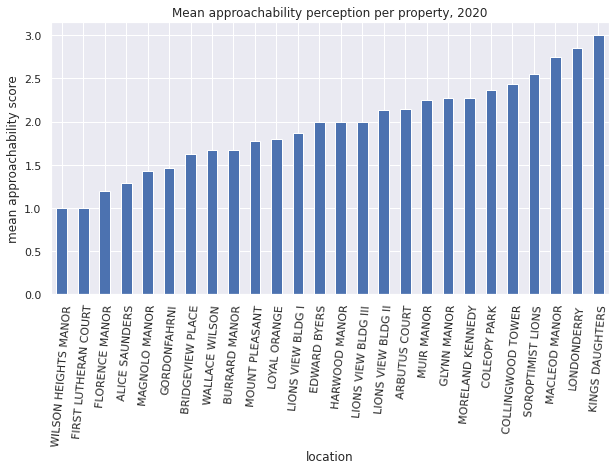

In [15]:
data.groupby('location')['apprch_bside'].mean().sort_values()
app = data.groupby('location')['apprch_bside'].mean().sort_values()
plt.figure(figsize = (10,5))
app.plot(kind = 'bar', rot = 85);
plt.xlabel('location')
plt.ylabel('mean approachability score')
plt.title('Mean approachability perception per property, 2020');

# tenants from wilson heights manor and first lutheran and florence manor
#   are very satisfied with BS
#  tenants from londonderry and king's daughters are least satisfied

### --> merge with assets

In [16]:
# compile mean for ordinals
df11 = data.location.value_counts()
df11 = df11.to_frame()
df11.head(3)

,location
BRIDGEVIEW PLACE,24
COLEOPY PARK,19
COLLINGWOOD TOWER,16


In [17]:
df11.rename(columns = {'location':'num_resp'},inplace=True)
df11.head(1)

,num_resp
BRIDGEVIEW PLACE,24


In [18]:
ordinal = ['nbr_relation', 'food_worry', 'apprch_bside', 'hlth_happy',
  'chat_often', 'rlns_safe', 'age','bside_dur']
for o in ordinal:
    df11[o]= data.groupby('location')[o].mean().round(1)
df11.head(3)

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur
BRIDGEVIEW PLACE,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7
COLEOPY PARK,19,1.9,1.8,2.4,2.8,2.4,4.0,7.8,3.5
COLLINGWOOD TOWER,16,2.0,1.4,2.4,2.7,2.0,3.6,8.3,3.3


In [19]:
# a bit of a stretch, but try to include binaries
binary = ['household', 'walk_aid', 'imm_status', 'bside_pre_muni']
for b in binary:
    df11[b]= data.groupby('location')[b].mean().round(1)
df11.head(3)

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni
BRIDGEVIEW PLACE,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7,0.9,1.8,0.6,0.8
COLEOPY PARK,19,1.9,1.8,2.4,2.8,2.4,4.0,7.8,3.5,0.8,1.7,0.4,0.8
COLLINGWOOD TOWER,16,2.0,1.4,2.4,2.7,2.0,3.6,8.3,3.3,0.9,1.7,0.3,0.9


In [20]:
df11.head()

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni
BRIDGEVIEW PLACE,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7,0.9,1.8,0.6,0.8
COLEOPY PARK,19,1.9,1.8,2.4,2.8,2.4,4.0,7.8,3.5,0.8,1.7,0.4,0.8
COLLINGWOOD TOWER,16,2.0,1.4,2.4,2.7,2.0,3.6,8.3,3.3,0.9,1.7,0.3,0.9
LIONS VIEW BLDG I,15,2.2,1.3,1.9,2.2,2.2,4.2,8.1,3.7,1.0,1.8,0.6,0.8
LIONS VIEW BLDG II,15,2.3,1.6,2.1,3.0,1.9,4.1,8.1,3.5,0.9,1.8,0.6,0.7


In [21]:
df11.to_csv('means')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec36858b-3dda-48ee-b585-815a2bd46f62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>